### Importo las librerias para trabajar

In [237]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import calendar

### Lectura y creacion de los archivos para trabajar

In [238]:
data=os.listdir("C:/Users/anala/OneDrive/Imágenes/Sales_Data/data")
all_sales= pd.DataFrame()
for file in data:
    all_sales=pd.concat([all_sales,pd.read_csv("C:/Users/anala/OneDrive/Imágenes/Sales_Data/data/"+file)])

all_sales.to_csv('all_sales.csv')
all_sales=pd.read_csv('all_sales.csv')


### Limpieza de los datos

In [239]:
df_Nan=all_sales[all_sales.isnull()]
all_sales=all_sales.dropna()
all_sales.head(2)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


In [240]:
all_sales= all_sales[all_sales['Quantity Ordered']!='Quantity Ordered']
all_sales['Quantity Ordered']= pd.to_numeric(all_sales['Quantity Ordered'])
all_sales['Price Each']= pd.to_numeric(all_sales['Price Each'])
all_sales['Sales']=all_sales['Quantity Ordered']*all_sales['Price Each']
all_sales['Month']=pd.to_datetime(all_sales['Order Date']).dt.month
all_sales['Day']=pd.to_datetime(all_sales['Order Date']).dt.day_name()
all_sales['Hour']=pd.to_datetime(all_sales['Order Date']).dt.hour


### Encontar el mes con mas ventas

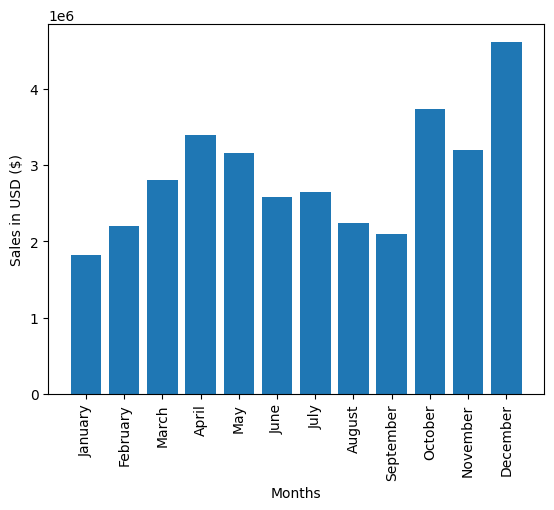

In [241]:
Month_sales=all_sales.groupby('Month').sum()['Sales']
Months= [calendar.month_name[month] for month in range(1,13)]
plt.bar(Months,Month_sales)
plt.xticks(Months , rotation='vertical')
plt.ylabel('Sales in USD ($)')
plt.xlabel('Months')
plt.show()

### Encuentra la ciudad con mas ventas

In [242]:
all_sales.head(2)

def get_city(direcion):
    return direcion.split(',')[1]

def get_states(direcion):
    return direcion.split(',')[2].split(' ')[1]

all_sales['City']=all_sales['Purchase Address'].apply(lambda x : f'{get_city(x)} ({get_states(x)})')
sales_city=all_sales.groupby('City').sum()['Sales']
citys = [city for city, df in all_sales.groupby(['City'])]



### Grafico para ver mejor los datos

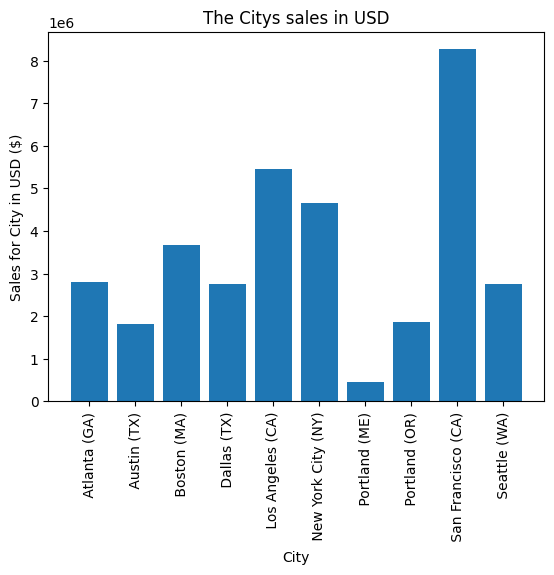

In [243]:
plt.bar(citys,sales_city)
plt.xticks(citys, rotation='vertical')
plt.xlabel('City')
plt.ylabel('Sales for City in USD ($)')
plt.title('The Citys sales in USD')
plt.show()

### Encuentra los 5 producto mas vendido

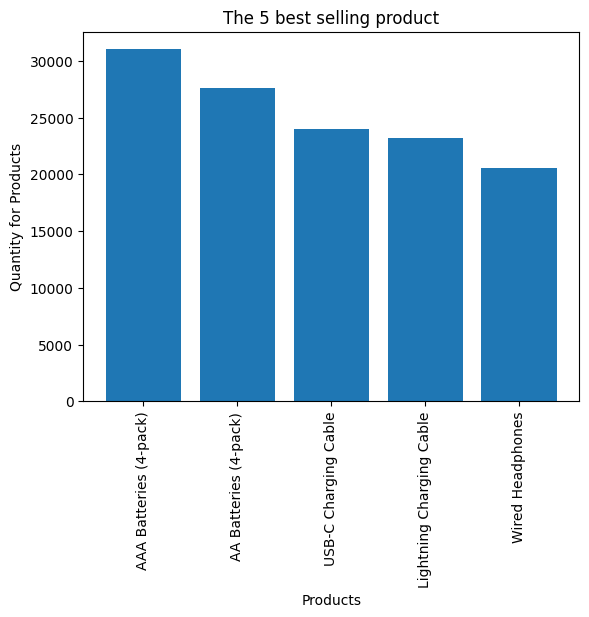

In [244]:
product=all_sales.groupby('Product').sum()['Quantity Ordered'].sort_values(ascending=False).head(5)
product=dict(product)

plt.bar(product.keys(),product.values())
plt.xticks(rotation='vertical')
plt.xlabel('Products')
plt.ylabel('Quantity for Products')
plt.title('The 5 best selling product')
plt.show()

### Encuentra los 5 productos menos vendidos

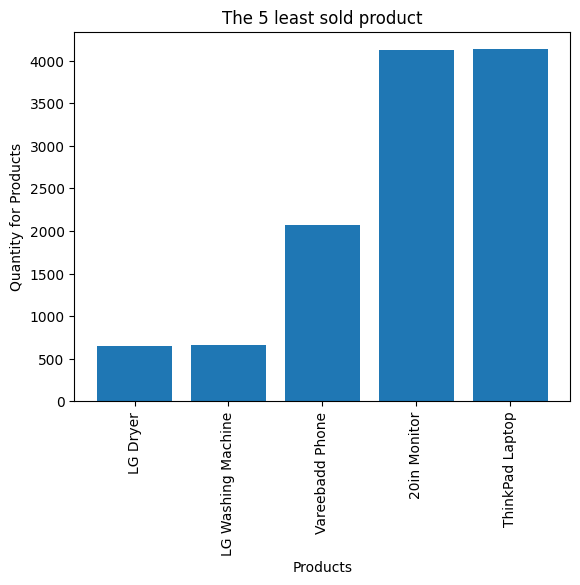

In [245]:
product=all_sales.groupby('Product').sum()['Quantity Ordered'].sort_values().head(5)
product=dict(product)

plt.bar(product.keys(),product.values())
plt.xticks(rotation='vertical')
plt.xlabel('Products')
plt.ylabel('Quantity for Products')
plt.title('The 5 least sold product')
plt.show()

### Grafico para ver el panorama de las ventas por producto completo

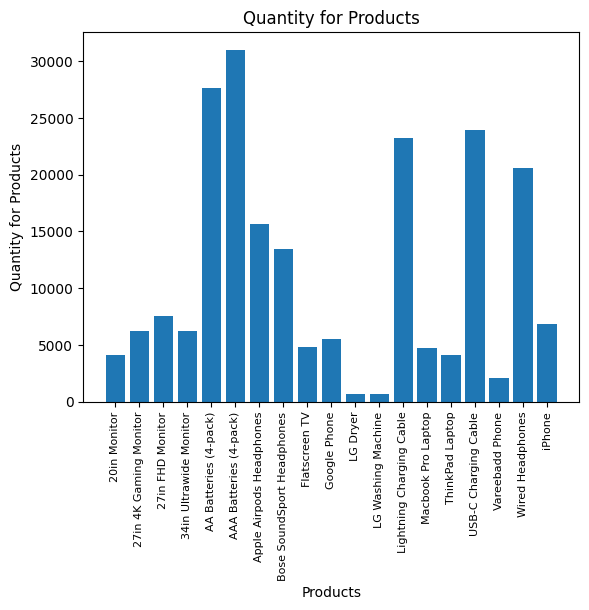

In [246]:
products=all_sales.groupby('Product')
Quantity=products.sum()['Quantity Ordered']
key=[pair for pair ,df in products]
plt.bar(key,Quantity)
plt.xticks(rotation='vertical',size=8)
plt.xlabel('Products')
plt.ylabel('Quantity for Products')
plt.title('Quantity for Products')
plt.show()

### comprobando si hay una relacion entre la cantida vendidad y el precio

C:\Users\anala\AppData\Local\Temp\ipykernel_7364\1140171988.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(key, rotation='vertical', size=8)
C:\Users\anala\AppData\Local\Temp\ipykernel_7364\1140171988.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


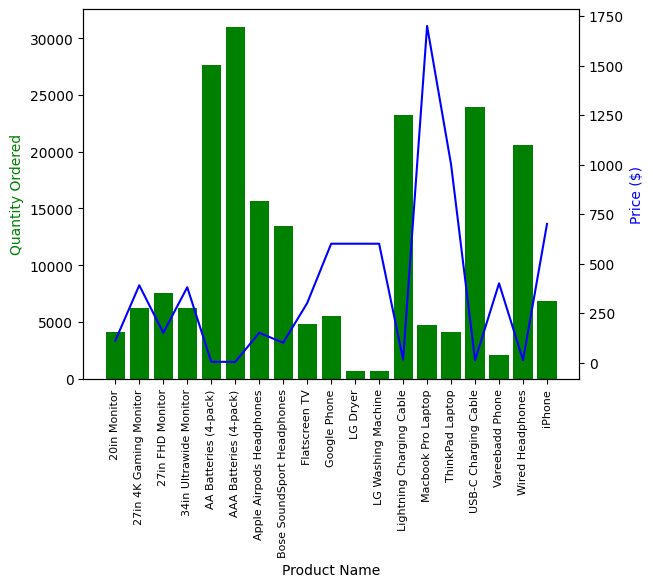

In [247]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

prices = all_sales.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(key, Quantity, color='g')
ax2.plot(key, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(key, rotation='vertical', size=8)

fig.show()

### Producto que genero mas ingresos

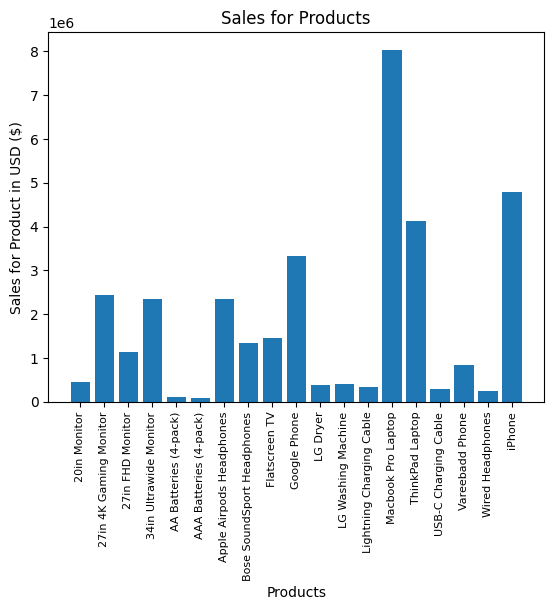

In [248]:
products=all_sales.groupby('Product')
Sales=products.sum()['Sales']
key=[pair for pair ,df in products]
plt.bar(key,Sales)
plt.xticks(rotation='vertical',size=8)
plt.xlabel('Products')
plt.ylabel('Sales for Product in USD ($)')
plt.title('Sales for Products')
plt.show()

### Total de las ventas por dias en todo el año

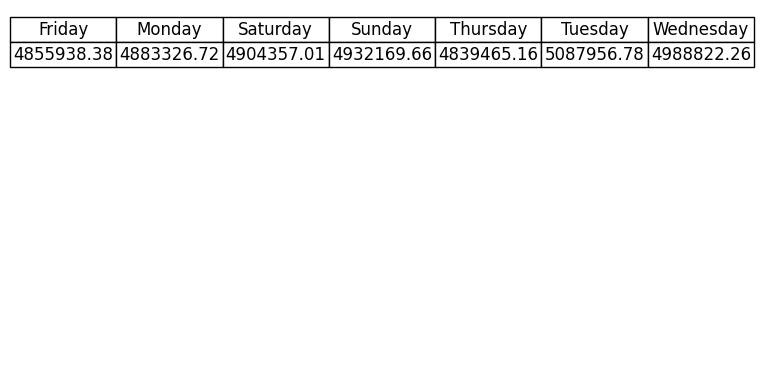

In [249]:
df_day=all_sales.groupby('Day')
sale_day=list(df_day['Sales'].sum())
days=[day for day ,df in df_day]
sale_day=[days,sale_day]
tabla=plt.table(cellText=sale_day, loc='upper center', cellLoc='center', colLabels=None)
tabla.auto_set_font_size(False)
tabla.set_fontsize(12)
tabla.scale(1.5, 1.5)  # Ajustar el tamaño de la tabla
plt.axis('off')
plt.show()


In [250]:
#creo la columna de los minutos 
all_sales['Minute']=pd.to_datetime(all_sales['Order Date']).dt.minute
all_sales['Order Date']=pd.to_datetime(all_sales['Order Date'])


In [251]:
#cambio el tipo de dato de la columna mes para que aperesca el nombre del mes y no el numero
all_sales['Month']=pd.to_datetime(all_sales['Order Date']).dt.month_name()
del all_sales['Unnamed: 0']

### Encontrar las horas con mas pedidos

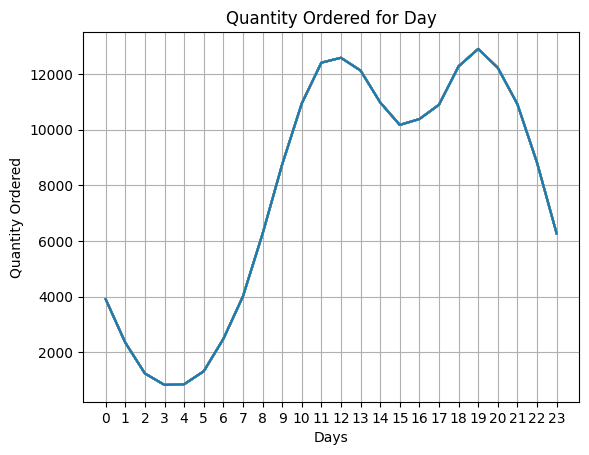

In [252]:
keys = [pair for pair, df in all_sales.groupby('Hour')]
plt.plot(keys, all_sales.groupby('Hour').count())
plt.xticks(keys)
plt.xlabel('Days')
plt.ylabel('Quantity Ordered')
plt.title('Quantity Ordered for Day')
plt.grid()
plt.show()

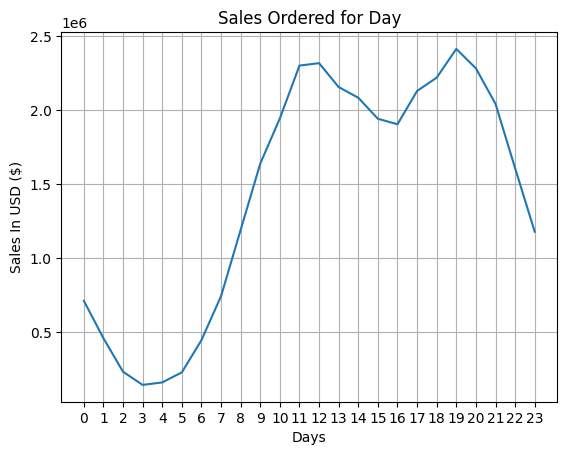

In [253]:
sales_hour=all_sales.groupby('Hour').sum()['Sales']
plt.plot(keys,sales_hour)
plt.xticks(keys)
plt.xlabel('Days')
plt.ylabel('Sales In USD ($)')
plt.title('Sales Ordered for Day')
plt.grid()
plt.show()

### Encuentro cuales son los dos productos que mas se venden juntos


In [254]:
df = all_sales[all_sales['Order ID'].duplicated(keep=False)]
df['Grouped'] = all_sales.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()


C:\Users\anala\AppData\Local\Temp\ipykernel_7364\585809431.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = all_sales.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


In [255]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

list_products_pair=[]
product_pair_value=[]
for key,value in count.most_common(10):
    key=str(key).replace(f"'",'')
    key=str(key).replace(f"(",'')
    key=str(key).replace(f")",'')
    list_products_pair.append(key)
    product_pair_value.append(value)

data={'Names of the Products':list_products_pair,'Quantity':product_pair_value}
df_10_products_best=pd.DataFrame(data,index=range(1,11))

### Los 10 pares de productos mas vendidos

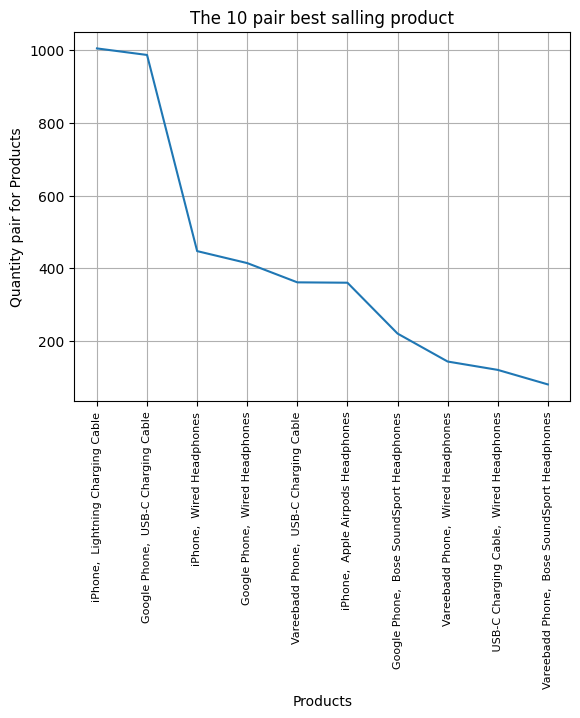

In [265]:
df_10_products_best
plt.plot(df_10_products_best['Names of the Products'],df_10_products_best['Quantity'])
plt.xticks(rotation='vertical',size=8)
plt.xlabel('Products')
plt.ylabel('Quantity pair for Products')
plt.title('The 10 pair best salling product')
plt.grid()
plt.show()